In [122]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [123]:
data = load_breast_cancer()
x,y = data.data,data.target
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [124]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [125]:
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


#Bagging 
bagging = BaggingClassifier(RandomForestClassifier(),n_estimators=50,random_state=42)
bagging.fit(x_train_scaled,y_train)
bagging_acc = accuracy_score(y_test,bagging.predict(x_test_scaled))

#adaBoosting
ada = AdaBoostClassifier(n_estimators=50,random_state=42)
ada.fit(x_train_scaled,y_train)
ada_acc = accuracy_score(y_test,ada.predict(x_test_scaled))

#Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=50,learning_rate = 0,random_state=42)
gb.fit(x_train_scaled,y_train)
gb_acc = accuracy_score(y_test,bagging.predict(x_test_scaled))

C:\Users\HASINI\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [126]:
xgb = XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42)
xgb.fit(x_train_scaled,y_train)
xgb_acc = accuracy_score(y_test,xgb.predict(x_test_scaled))

C:\Users\HASINI\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:16:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [127]:
import pandas as pd
results_df = pd.DataFrame({
    "Model" : ["Bagging","AdaBoost","Gradient Boosting","XGBoosting"],
    "Accuracy" : [bagging_acc,ada_acc,gb_acc,xgb_acc]
})
results_df

,Model,Accuracy
0,Bagging,0.964912
1,AdaBoost,0.973684
2,Gradient Boosting,0.964912
3,XGBoosting,0.956140


In [128]:
####task

In [129]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [130]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [131]:
data.duplicated().sum()

0

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


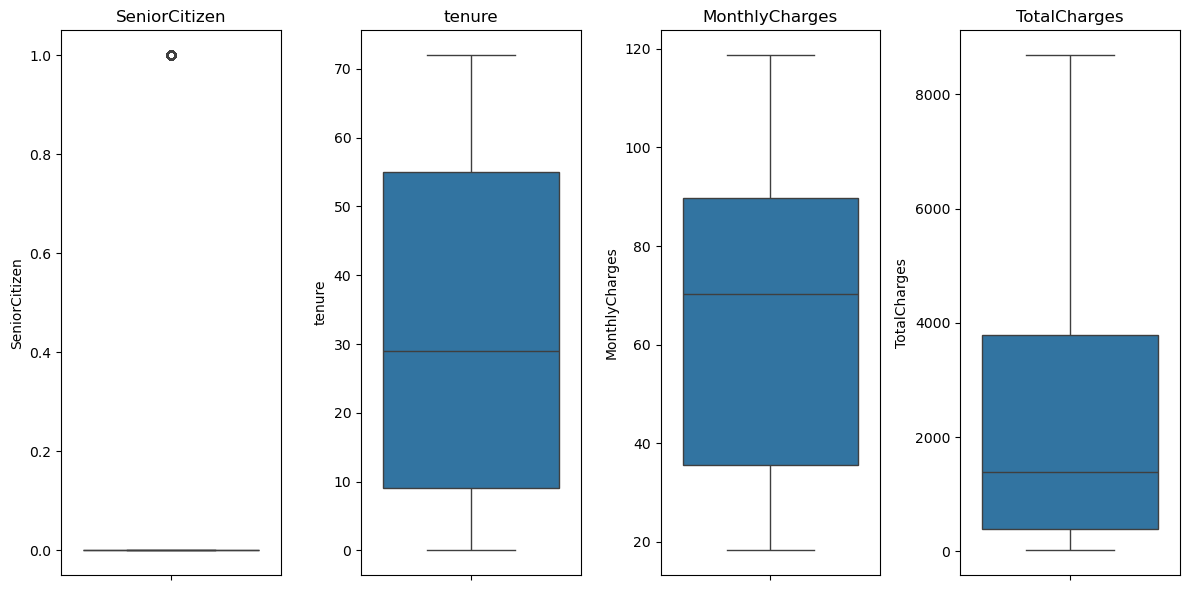

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

numerical_cols = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i+1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [143]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Preprocessing
data.drop(columns=['customerID'], errors='ignore', inplace=True)  
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0)

X = data.drop(columns=['Churn'])  
y = data['Churn']

y = LabelEncoder().fit_transform(y)

categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Bagging": BaggingClassifier(estimator=RandomForestClassifier(n_estimators=10), n_estimators=10, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=20, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=20, random_state=42, eval_metric="logloss")
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    results[name] = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {results[name]:.4f}")

Bagging Accuracy: 0.8055


C:\Users\HASINI\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.8226
GradientBoosting Accuracy: 0.8105
XGBoost Accuracy: 0.8105


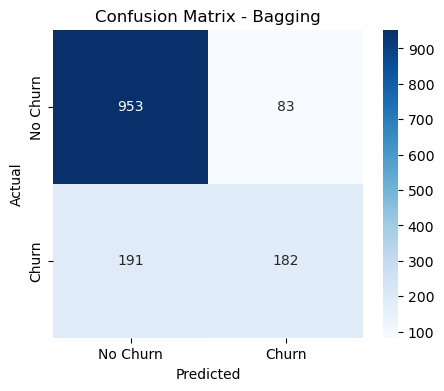

Bagging Accuracy: 0.8055


C:\Users\HASINI\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


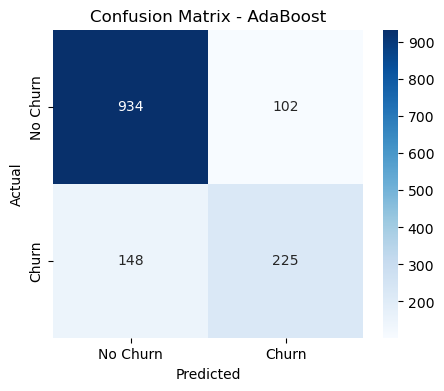

AdaBoost Accuracy: 0.8226


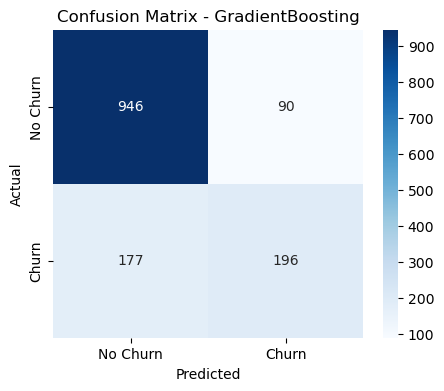

GradientBoosting Accuracy: 0.8105


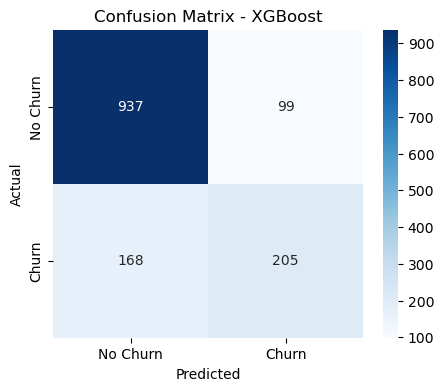

XGBoost Accuracy: 0.8105


In [147]:

from sklearn.metrics import accuracy_score, confusion_matrix
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, predictions)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, predictions)
    
    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    print(f"{name} Accuracy: {acc:.4f}")


XGBoost Accuracy: 0.8105
Classification Report for XGBoost:
              precision    recall  f1-score   support

    No Churn       0.85      0.90      0.88      1036
       Churn       0.67      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



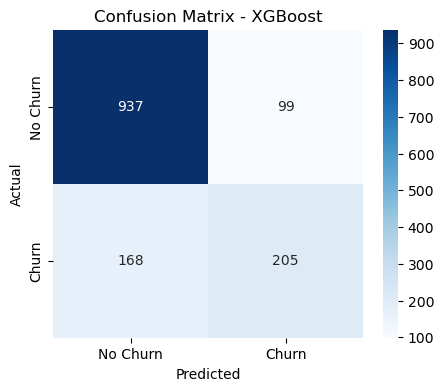

In [151]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions, target_names=["No Churn", "Churn"])

print(f"\n{name} Accuracy: {acc:.4f}")
print(f"Classification Report for {name}:\n{report}")
    
    # Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {name}')
plt.show()